In [1]:
#
# Change Images to dataset
#
# @author becxer
# @email becxer87@gmail.com
# @reference https://github.com/sjchoi86/Tensorflow-101
#

import os, sys
from scipy.misc import imread, imresize
import skimage.io
import skimage.transform

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

print ("packages are loaded")

packages are loaded


In [2]:
# Specify one directory path to one class label
img_path = ["images/MYIMG/bike", "images/MYIMG/cars", "images/MYIMG/person"]

# Options for reshape
img_size = [64, 64]
cvt2gray = True

In [3]:
#change to grayscale
def rgb2gray(rgb_img):
    if len(rgb_img.shape) == 3:
        return np.dot(rgb_img,[0.299,0.587,0.114])
    else:
        return rgb_img

In [4]:
# Read image from img_path
valid_exts = [".jpg",".gif",".png",".tga", ".jpeg", ".bmp"]

class_n = len(img_path)
image_count = 0
dataset_img = []
dataset_label = []

for idx, path in enumerate(img_path) :
    files = os.listdir(path)
    for one_f in files:
        if os.path.splitext(one_f)[1].lower() not in valid_exts:
            continue
        one_img = imread(path + '/' + one_f)
        if cvt2gray:
            one_img = rgb2gray(one_img)
        one_img_small = imresize(one_img,[img_size[0], img_size[1]])/255.
        one_img_vector = np.reshape(one_img_small, (-1,))
        dataset_img.append(one_img_vector)
        dataset_label.append(np.eye(class_n,class_n)[idx])
        image_count += 1
dataset_img = np.array(dataset_img)
dataset_label = np.array(dataset_label)

print ("dataset img shape : " + str(dataset_img.shape))
print ("dataset label shape : " + str(dataset_label.shape))

print ("Loaded class count : " + str(class_n))
print ("Loaded image count : " + str(image_count))

dataset img shape : (1096, 4096)
dataset label shape : (1096, 3)
Loaded class count : 3
Loaded image count : 1096


In [5]:
# Devide data into train/valid/test set
def divide_dataset(dataset_feature, dataset_label, divide_key, divide_ratio):
    res = {}
    rsum = np.sum(divide_ratio)
    n_dataset = len(dataset_feature)
    for idx in range(len(divide_ratio) - 1):
        now_nds = dataset_feature.shape[0]
        n_section = n_dataset * divide_ratio[idx] / rsum
        rand_idx = np.arange(now_nds)
        np.random.shuffle(rand_idx)
        rand_idx =  rand_idx[:n_section]
        res[divide_key[idx]] = {"images":[], "labels":[]}
        res[divide_key[idx]]["images"] = dataset_feature[rand_idx,:]
        res[divide_key[idx]]["labels"] = dataset_label[rand_idx,:]
        dataset_feature = np.delete(dataset_feature,rand_idx,0)
        dataset_label = np.delete(dataset_label,rand_idx,0)
    res[divide_key[-1]] = {"images":[], "labels":[]}
    res[divide_key[-1]]["images"] = dataset_feature
    res[divide_key[-1]]["labels"] = dataset_label
    return res

res = divide_dataset(dataset_img, dataset_label, ["train","valid", "test"], [8,1,1])
print ("train img shape : " + str(res['train']['images'].shape))
print ("train label shape : " + str(res['train']['labels'].shape))
print ("valid img shape : " + str(res['valid']['images'].shape))
print ("valid label shape : " + str(res['valid']['labels'].shape))
print ("test img shape : " + str(res['test']['images'].shape))
print ("test label shape : " + str(res['test']['labels'].shape))

train img shape : (876, 4096)
train label shape : (876, 3)
valid img shape : (109, 4096)
valid label shape : (109, 3)
test img shape : (111, 4096)
test label shape : (111, 3)


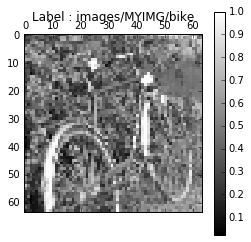

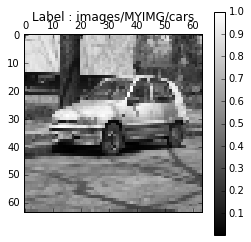

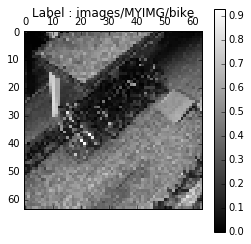

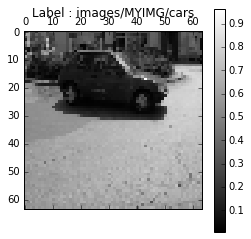

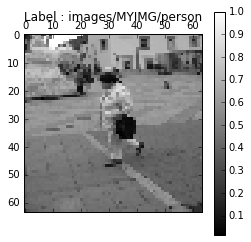

In [7]:
# Plot image
rand_idx = np.arange(res['train']['images'].shape[0])
np.random.shuffle(rand_idx)
rand_idx =  rand_idx[:5]

for idx in rand_idx:
    label = np.argmax(res['train']['labels'][idx])
    if cvt2gray:
        img = np.reshape(res['train']['images'][idx], (img_size[0],img_size[1]))
        plt.matshow(img,cmap=plt.get_cmap('gray'))
    else:
        img = p.reshape(res['train']['images'][idx], (img_size[0],img_size[1],3))
        plt.imshow(img)
    plt.colorbar()
    plt.title("Label : " + str(img_path[label]))
    plt.show()

In [8]:
# Save npz data
npz_path = "images/MYIMG/my_img.npz"

np.savez(npz_path, \
         train_img = res['train']['images'], train_label = res['train']['labels'],\
         valid_img = res['valid']['images'], valid_label = res['valid']['labels'],\
         test_img = res['test']['images'], test_label = res['test']['labels']\
        )

print ("Saved in " + npz_path)

Saved in images/MYIMG/my_img.npz


In [9]:
# Load npz data
npz_path = "images/MYIMG/my_img.npz"

load_data = np.load(npz_path)
print ("Load data : " + str(load_data.files))

train_img = load_data['train_img']
train_label = load_data['train_label']
valid_img = load_data['valid_img']
valid_label = load_data['valid_label']
test_img = load_data['test_img']
test_label = load_data['test_label']

print ("train_img shape : "  + str(train_img.shape))
print ("valid_img shape : "  + str(valid_img.shape))
print ("test_img shape : "  + str(test_img.shape))

Load data : ['valid_img', 'train_img', 'test_img', 'train_label', 'test_label', 'valid_label']
train_img shape : (876, 4096)
valid_img shape : (109, 4096)
test_img shape : (111, 4096)


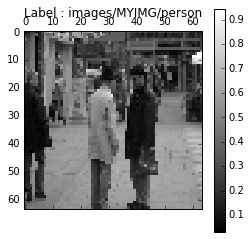

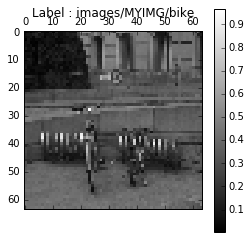

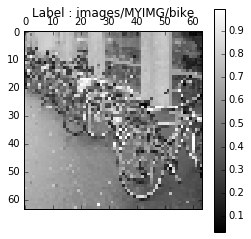

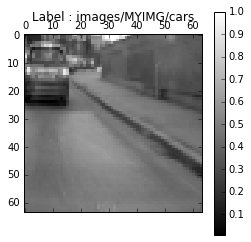

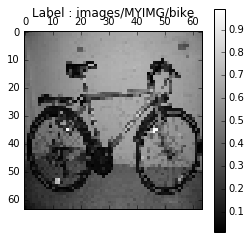

In [10]:
# Plot image
rand_idx = np.arange(train_img.shape[0])
np.random.shuffle(rand_idx)
rand_idx =  rand_idx[:5]

for idx in rand_idx:
    label = np.argmax(train_label[idx])
    if cvt2gray:
        img = np.reshape(train_img[idx], (img_size[0],img_size[1]))
        plt.matshow(img,cmap=plt.get_cmap('gray'))
    else:
        img = p.reshape(train_img[idx], (img_size[0],img_size[1],3))
        plt.imshow(img)
    plt.colorbar()
    plt.title("Label : " + str(img_path[label]))
    plt.show()

In [2]:
# Specify one directory path to one class label
img_path = ["images/MYIMG/bike", "images/MYIMG/cars", "images/MYIMG/person"]

# Options for reshape
img_size = [64, 64]
cvt2gray = False

In [4]:
# Read image from img_path
valid_exts = [".jpg",".gif",".png",".tga", ".jpeg", ".bmp"]

class_n = len(img_path)
image_count = 0
dataset_img = []
dataset_label = []

for idx, path in enumerate(img_path) :
    files = os.listdir(path)
    for one_f in files:
        if os.path.splitext(one_f)[1].lower() not in valid_exts:
            continue
        one_img = imread(path + '/' + one_f)
        if cvt2gray:
            one_img = rgb2gray(one_img)
        one_img_small = imresize(one_img,[img_size[0], img_size[1]])/255.
        one_img_vector = np.reshape(one_img_small, (-1,))
        dataset_img.append(one_img_vector)
        dataset_label.append(np.eye(class_n,class_n)[idx])
        image_count += 1
dataset_img = np.array(dataset_img)
dataset_label = np.array(dataset_label)

print ("dataset img shape : " + str(dataset_img.shape))
print ("dataset label shape : " + str(dataset_label.shape))

print ("Loaded class count : " + str(class_n))
print ("Loaded image count : " + str(image_count))

dataset img shape : (1096, 12288)
dataset label shape : (1096, 3)
Loaded class count : 3
Loaded image count : 1096


In [5]:
# Devide data into train/valid/test set
def divide_dataset(dataset_feature, dataset_label, divide_key, divide_ratio):
    res = {}
    rsum = np.sum(divide_ratio)
    n_dataset = len(dataset_feature)
    for idx in range(len(divide_ratio) - 1):
        now_nds = dataset_feature.shape[0]
        n_section = n_dataset * divide_ratio[idx] / rsum
        rand_idx = np.arange(now_nds)
        np.random.shuffle(rand_idx)
        rand_idx =  rand_idx[:n_section]
        res[divide_key[idx]] = {"images":[], "labels":[]}
        res[divide_key[idx]]["images"] = dataset_feature[rand_idx,:]
        res[divide_key[idx]]["labels"] = dataset_label[rand_idx,:]
        dataset_feature = np.delete(dataset_feature,rand_idx,0)
        dataset_label = np.delete(dataset_label,rand_idx,0)
    res[divide_key[-1]] = {"images":[], "labels":[]}
    res[divide_key[-1]]["images"] = dataset_feature
    res[divide_key[-1]]["labels"] = dataset_label
    return res

res = divide_dataset(dataset_img, dataset_label, ["train","valid", "test"], [8,1,1])
print ("train img shape : " + str(res['train']['images'].shape))
print ("train label shape : " + str(res['train']['labels'].shape))
print ("valid img shape : " + str(res['valid']['images'].shape))
print ("valid label shape : " + str(res['valid']['labels'].shape))
print ("test img shape : " + str(res['test']['images'].shape))
print ("test label shape : " + str(res['test']['labels'].shape))

train img shape : (876, 12288)
train label shape : (876, 3)
valid img shape : (109, 12288)
valid label shape : (109, 3)
test img shape : (111, 12288)
test label shape : (111, 3)


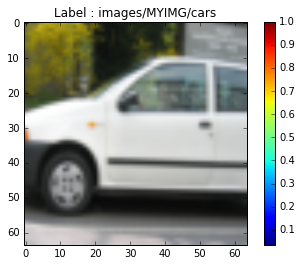

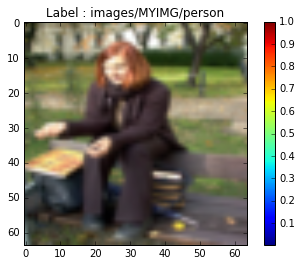

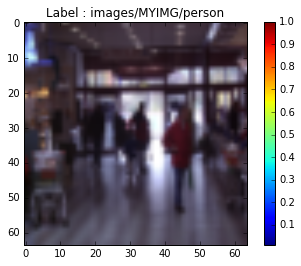

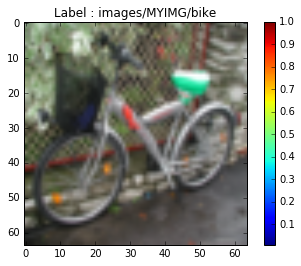

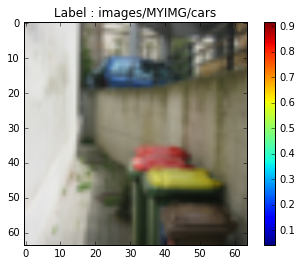

In [7]:
# Plot image
rand_idx = np.arange(res['train']['images'].shape[0])
np.random.shuffle(rand_idx)
rand_idx =  rand_idx[:5]

for idx in rand_idx:
    label = np.argmax(res['train']['labels'][idx])
    if cvt2gray:
        img = np.reshape(res['train']['images'][idx], (img_size[0],img_size[1]))
        plt.matshow(img,cmap=plt.get_cmap('gray'))
    else:
        img = np.reshape(res['train']['images'][idx], (img_size[0],img_size[1],3))
        plt.imshow(img)
    plt.colorbar()
    plt.title("Label : " + str(img_path[label]))
    plt.show()

In [8]:
# Save npz data
npz_path = "images/MYIMG/my_img_color.npz"

np.savez(npz_path, \
         train_img = res['train']['images'], train_label = res['train']['labels'],\
         valid_img = res['valid']['images'], valid_label = res['valid']['labels'],\
         test_img = res['test']['images'], test_label = res['test']['labels']\
        )

print ("Saved in " + npz_path)

Saved in images/MYIMG/my_img_color.npz
